# SKYE 

Analyzing 360-degree images for ecological analysis with python.

This notebook provides examples of some of the current supported features and functions.

In [ ]:
# from skye.core import SkyViewClassified, SkyViewThreshold

# from matplotlib import pyplot as plt
# %matplotlib inline  

In [2]:
import os
import sys
import glob
import random

sys.path.insert(0, os.path.abspath(".."))

from skye.handlers.spherical import load_equirectangular
from matplotlib import pyplot as plt
from jupyter_compare_view import compare


%matplotlib inline  

Jupyter compare_view v0.2.4


`skye.core` will create hemispherical photos, classified sky vs non-sky classified images, and the sky-view-factor from 360-degree RGB images. 

There are currently two supported methods two create these objects. The first, `SkyViewThreshold` uses a threshold value to create binary sky non-sky images while the second, `SkyViewClassified` uses the quickshift segmentation alrogithm to create superpixels which can then be classified using machine learning methods.

## Sky View Classified

First, let's create and analyze images using computer vision and image classification. We will create a `SkyViewClassified` object using a 360 image taken from a Ricoh Theta S and some predefined training data. See the training data section below for how to create training data.

Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%

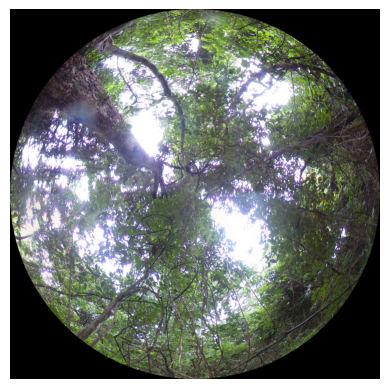

In [21]:
import os

path = 'images'

for directory in os.listdir(path):
    plot_path = os.path.join(path, directory)
    if not os.path.isdir(plot_path):
        continue
    for img in os.listdir(plot_path):
        full_path = os.path.join(plot_path, img)
        file_name = f"{directory}|{img}"

        sky_view = load_equirectangular(full_path)
        imgplot = plt.imshow(sky_view.image)
        plt.axis('off')
        plt.savefig(f"images_hemi/{file_name}", dpi=300, bbox_inches='tight', pad_inches=0)

In [28]:
import geopandas as gpd

df = gpd.read_file('~/Desktop/intersection.gpkg')
df.shape

(15, 141)

Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████
Creating Hemispherical Photo: 100%|██████████


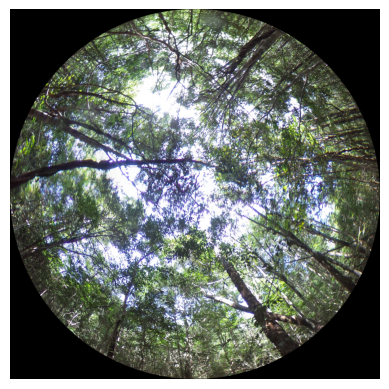

In [27]:



for index, row in df.iterrows():
    fn = row['filename']
    sn = row['shot_number']
    file_name = f"{fn}|{sn}"
    sky_view = load_equirectangular(row['photo'])
    imgplot = plt.imshow(sky_view.image)
    plt.axis('off')
    plt.savefig(f"images_hemi/{file_name}", dpi=300, bbox_inches='tight', pad_inches=0)

In [8]:
sky_view = load_equirectangular(image)

Creating Hemispherical Photo: 100%|██████████


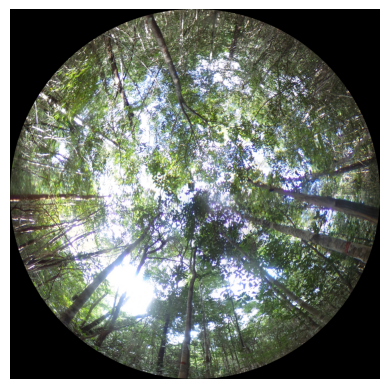

In [11]:
imgplot = plt.imshow(sky_view.image)
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight', pad_inches = 0)


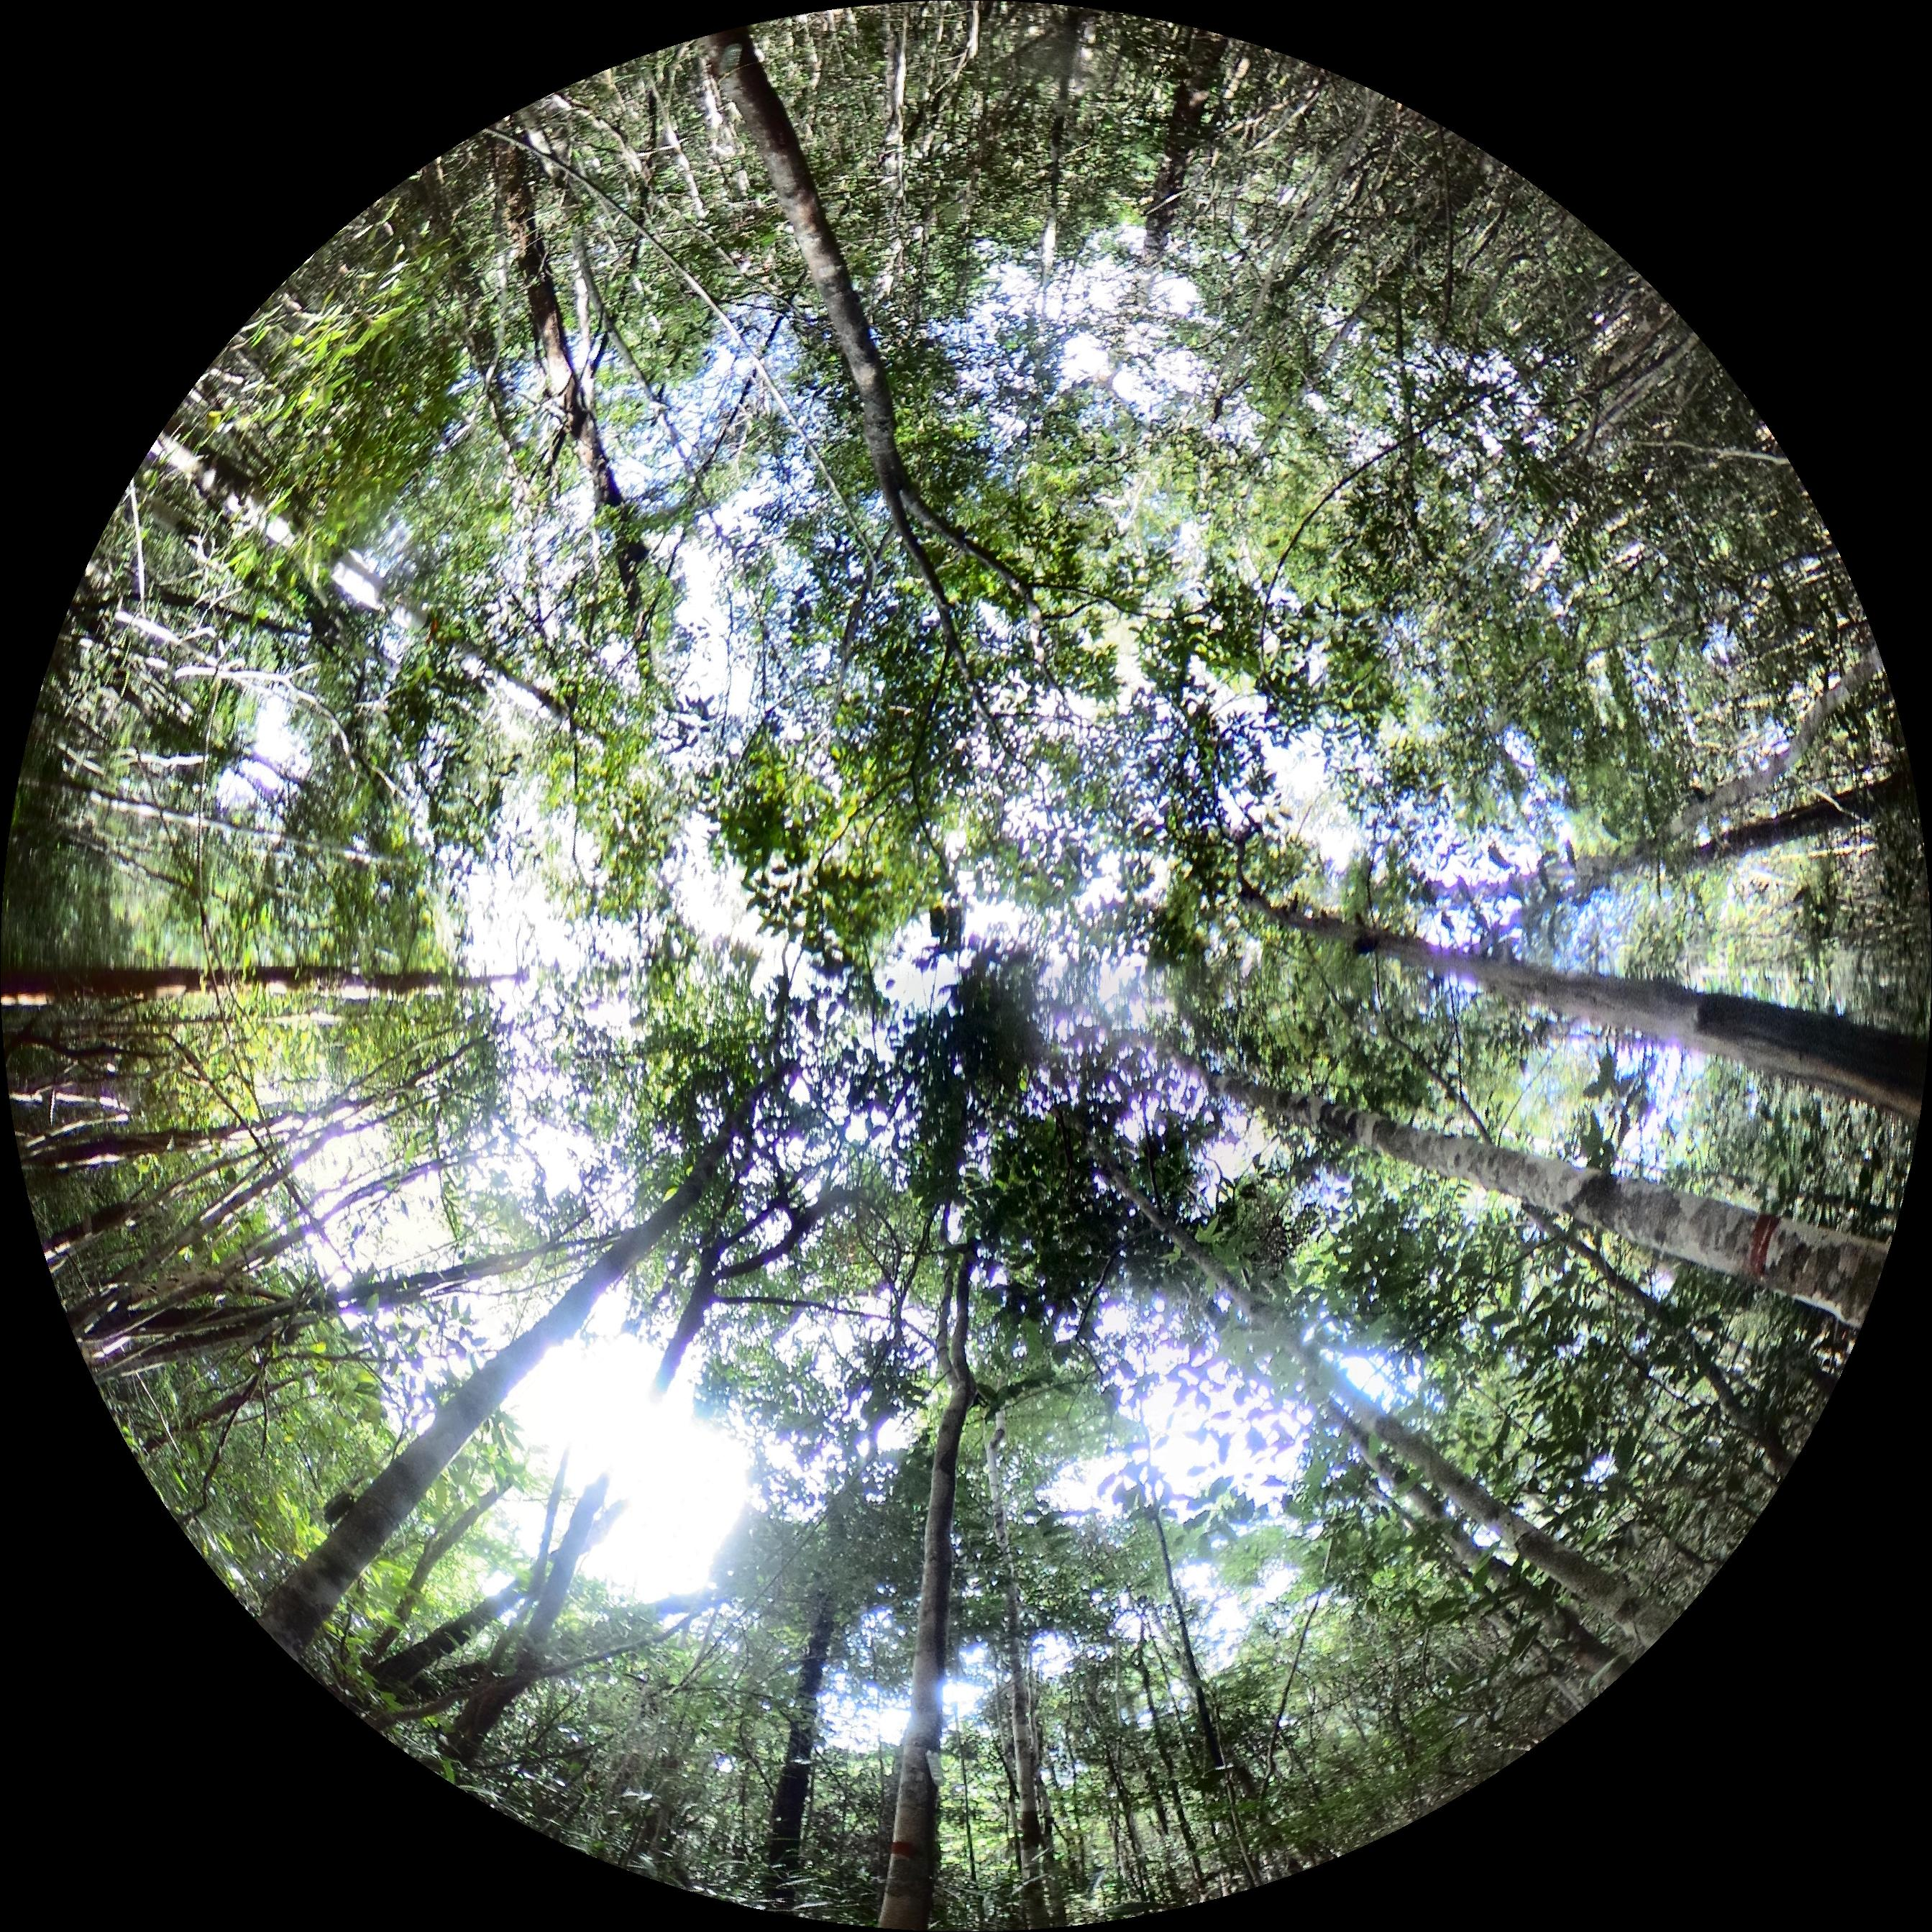
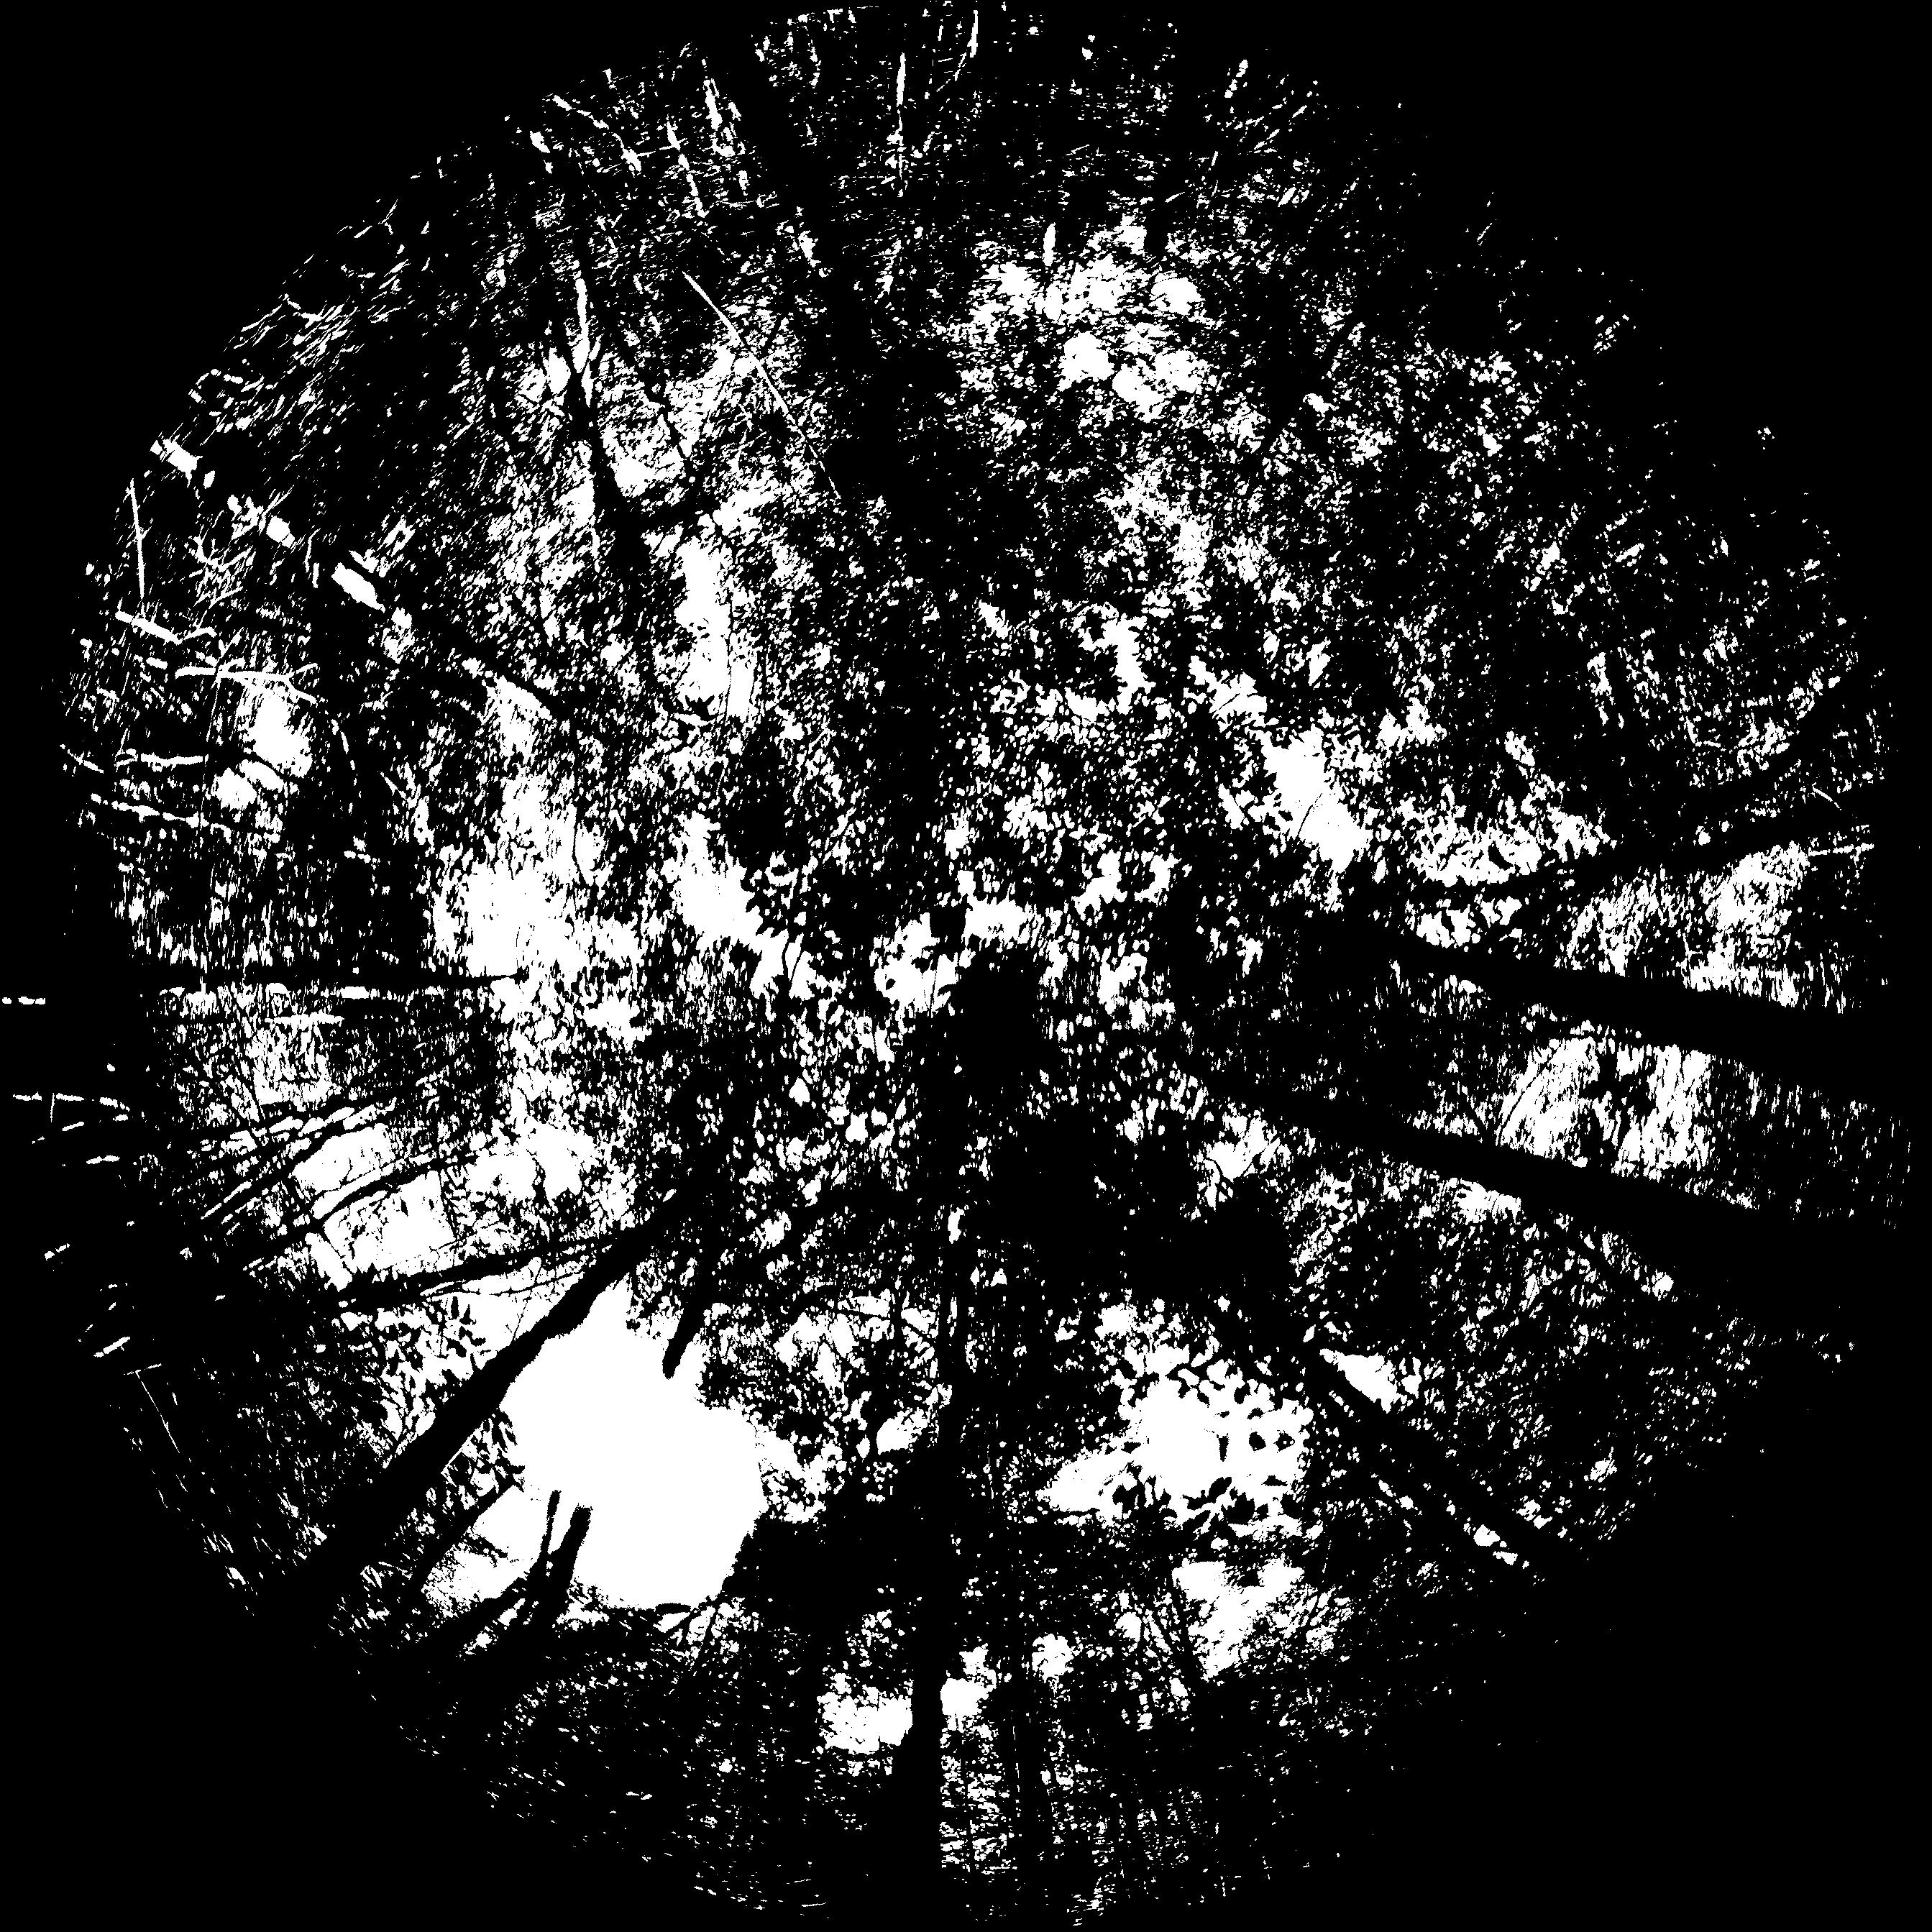

In [18]:
compare(skye_binarization.img, skye_binarization.classified_img, start_mode="horizontal", start_slider_pos=1, height=850)

Now that the object has been created, we can simply extract all that we need. First we can observe the hemispherical image:

Since `SkyViewClassified` class uses image segmentation and classification, it is possible to view the resulting segmented image as well as the statistics associated with each segment. These are crucial for the image classification that was used to create the binary sky image. Note, currently parameters to control the tuning of these models are not exposed during this experimental phase of the library.

In [ ]:
skye_quickshift = SkyView(image, training_data_path='training.csv', segmentation_method='quickshift', enhance_image=True, ratio=0.85)

In [ ]:
compare(skye_quickshift.img, skye_quickshift.segmented_img, start_mode="horizontal", start_slider_pos=1, height=850)

In [ ]:
compare(skye_quickshift.img, skye_quickshift.classified_img, start_mode="horizontal", start_slider_pos=1, height=850)

And the resulting classified image:

Finally, we can extract the sky view factor (canopy openness):

In [19]:
skye_binarization.calculate_svf()
print(skye_binarization.sky_view_factor) 
print(1 - skye_binarization.sky_view_factor) 
# print(skye_quickshift.sky_view_factor) 

0.2173007758919517
0.7826992241080483


In [20]:
gap_fractions = skye_binarization.compute_gap_fractions()
gap_fractions

[0.0,
 0.6180081855388813,
 0.6662120695533583,
 0.7173284649322988,
 0.6926491932041322,
 0.6542393265183404,
 0.6186572545447645,
 0.6234614418487817,
 0.6392287489590673,
 0.6691291807923898,
 0.7060213966579677,
 0.7289956065551553,
 0.739439493589196,
 0.7423280637205353,
 0.7425475388573939,
 0.7407477169296577,
 0.7332386651790243,
 0.7290434239832035,
 0.7305224796588508,
 0.7322314988356904,
 0.7390419124856096,
 0.7470166250910274,
 0.7525083800933601,
 0.7549226559734599,
 0.75673912166603,
 0.7583947942108336,
 0.761718284061112,
 0.7644324958708054,
 0.7678910388367622,
 0.7691696418850074,
 0.7695810965748172,
 0.7682137193972965,
 0.7644434360757255,
 0.761202795412592,
 0.7583283381629833,
 0.7514093157079155,
 0.7474441347704177,
 0.7449209706933195,
 0.7418460230816775,
 0.7378313027835859,
 0.7333139160953244,
 0.7299280873846004,
 0.7263512178567859,
 0.7224969677797496,
 0.718886175814293,
 0.7155308150878759,
 0.7111515584460042,
 0.7068806689561604,
 0.7029248618

In [21]:
LAI = skye_binarization.calculate_LAI(gap_fractions)

In [22]:
LAI

0.39149516777908544

In [16]:
skye_binarization.img.save("plot12.png")

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [75]:
height = pd.read_csv("~/Dropbox/Academic/phd/plot_results.csv")
height = height[height['plot_id'] != 9]

hemi = pd.read_csv("~/Dropbox/Academic/phd/image_results.csv")
hemi = hemi[hemi['filename'] != 'R0012442']
height

Unnamed: 0  height  ...           aquisition      description
0            1      15  ...  2020-04-28 09:42:24    Coverage beam
1            2      15  ...  2020-04-28 09:42:24    Coverage beam
2            3       8  ...  2022-03-21 23:45:25  Full power beam
3            4      18  ...  2022-03-21 23:45:25  Full power beam
4            5      18  ...  2022-03-21 23:45:25  Full power beam
5            6      14  ...  2022-03-21 23:45:25  Full power beam
7            8      15  ...  2020-04-28 09:42:24    Coverage beam
8            9      14  ...  2020-04-28 09:42:24    Coverage beam
9           10      15  ...  2020-04-28 09:42:24    Coverage beam
10          11      14  ...  2022-03-21 23:45:25  Full power beam
11          12      14  ...  2022-03-21 23:45:25  Full power beam
12          13       9  ...  2022-03-21 23:45:25  Full power beam
13          14      14  ...  2020-04-28 09:42:24    Coverage beam

[13 rows x 7 columns]

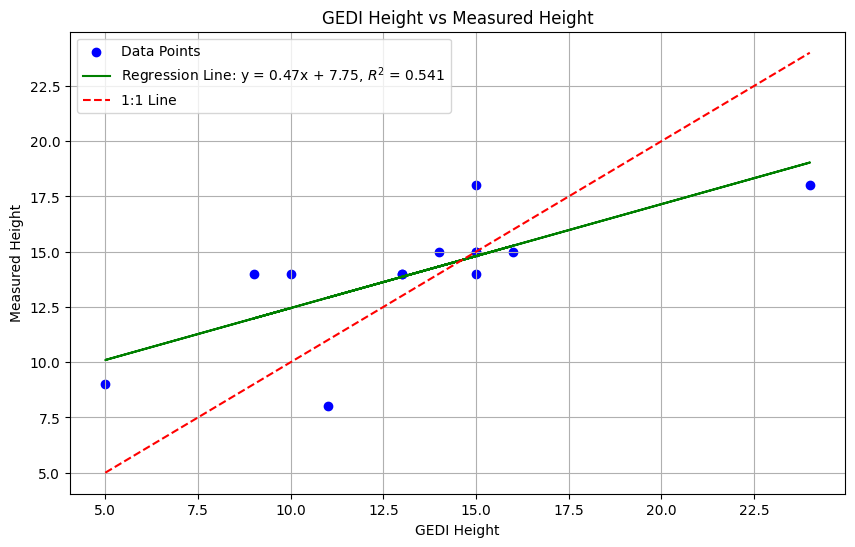

In [94]:
gedi_height = height['rh100'].to_list()
measured_height = height['height'].to_list()

# Compute the line of best fit (regression line)
m, b = np.polyfit(gedi_height, measured_height, 1)

# Predicted values
predicted_values = m * np.array(gedi_height) + b

# Compute the R^2 value
r2 = r2_score(measured_height, predicted_values)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(gedi_height, measured_height, c='blue', label='Data Points')
plt.plot(gedi_height, predicted_values, 'g-', label=f'Regression Line: y = {m:.2f}x + {b:.2f}, $R^2$ = {r2:.3f}')
plt.plot([min(gedi_height), max(gedi_height)], [min(gedi_height), max(gedi_height)], 'r--', label='1:1 Line')

# Adding titles and labels
plt.title("GEDI Height vs Measured Height")
plt.xlabel("GEDI Height")
plt.ylabel("Measured Height")
plt.legend()
plt.grid(True)

# Save and display the plot
plt.savefig('relative_height.png', dpi=300)
plt.show()

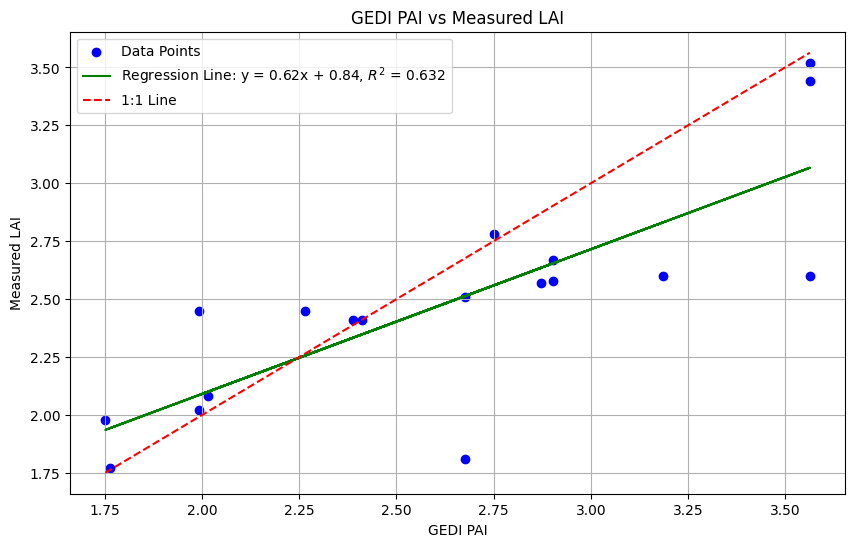

<Figure size 640x480 with 0 Axes>

In [92]:
gedi_pai = hemi['pai'].to_list()
measured_lai = hemi['lai'].to_list()

m, b = np.polyfit(gedi_pai, measured_lai, 1)

# Predicted values
predicted_values = m * np.array(gedi_pai) + b

# Compute the R^2 value
r2 = r2_score(measured_lai, predicted_values)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(gedi_pai, measured_lai, c='blue', label='Data Points')
plt.plot(gedi_pai, predicted_values, 'g-', label=f'Regression Line: y = {m:.2f}x + {b:.2f}, $R^2$ = {r2:.3f}')
plt.plot([min(gedi_pai), max(gedi_pai)], [min(gedi_pai), max(gedi_pai)], 'r--', label='1:1 Line')

# Adding titles and labels
plt.title("GEDI PAI vs Measured LAI")
plt.xlabel("GEDI PAI")
plt.ylabel("Measured LAI")
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('plant_area_index.png', dpi=300)

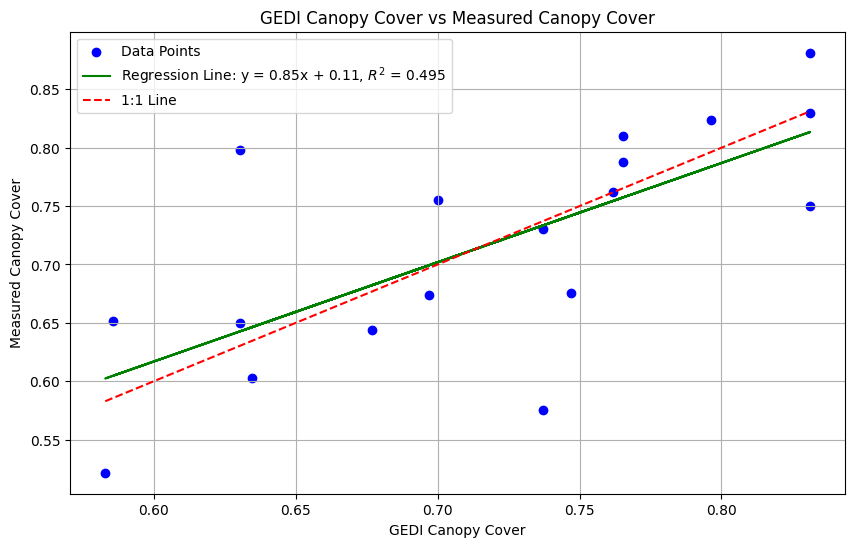

<Figure size 640x480 with 0 Axes>

In [91]:
gedi_cover = hemi['cover'].to_list()
measured_cover = hemi['openness'].to_list()
m, b = np.polyfit(gedi_cover, measured_cover, 1)

# Predicted values
predicted_values = m * np.array(gedi_cover) + b

# Compute the R^2 value
r2 = r2_score(measured_cover, predicted_values)

# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(gedi_cover, measured_cover, c='blue', label='Data Points')
plt.plot(gedi_cover, predicted_values, 'g-', label=f'Regression Line: y = {m:.2f}x + {b:.2f}, $R^2$ = {r2:.3f}')
plt.plot([min(gedi_cover), max(gedi_cover)], [min(gedi_cover), max(gedi_cover)], 'r--', label='1:1 Line')

# Adding titles and labels
plt.title("GEDI Canopy Cover vs Measured Canopy Cover")
plt.xlabel("GEDI Canopy Cover")
plt.ylabel("Measured Canopy Cover")
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('canopy_cover.png', dpi=300)

## Creating training data for Sky View Classified

Finally, we can create training data for the classification algorithm using in `SkyViewClass`. 

In [ ]:
skye_binarization.create_training_data(n_samples=10, notebook=True)

In [ ]:
skye.export_training_data('training_data_expanded.csv')

In [ ]:
skye = SkyViewClassified('R0012437.JPG')

In [ ]:
skye.create_training_data(n_samples=1000, notebook=True)